In [1]:
#install pint if needed
try:
    from pint import UnitRegistry
except ImportError:
    %pip install pint
    
# import units
from pint import UnitRegistry
units = UnitRegistry()

In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

In [3]:
# import functions from modsim

from modsim import *

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd

For this example we will be using a AJ-60A booster from the Atlas V.

Assumptions:
- drag coefficient is the same as a baseball
- earth is a perfect circle 12,756 km in diameter (~equatorial diameter)
- thrust is constant

TODO:
- improve gnc to get to orbit
    - multiple burns??
    - figure out what the burn should be to get to orbit
    - fudge burn time to get there
- multiple stages
    - unify trust/burn time/mass into a class
    - control with gnc
- improve trust equations, [see specific impulse by nasa](https://www.grc.nasa.gov/www/k-12/airplane/specimp.html)
- throttle trust


Pitch over happens at 244m, for this simulation we'll say the angle change instantaneously from 90 degrees (vertical) to 45 degrees. In the future a more complicated approach will be used. [This article](https://globaljournals.org/GJSFR_Volume12/6-Computational-Algorithm-for-Gravity.pdf) explains more of the math behind pitch over.

In [4]:
# from gravity import calc_gravity
# print(calc_gravity(Vector(0,0), params))
# print(calc_gravity(Vector(100000, 0), params))

The drag force is dependant on the density of the air. Which depends on the altitude, temperature, and pressure. To simplify this we will be use values from [this table](https://www.engineeringtoolbox.com/standard-atmosphere-d_604.html). In the future we might enhance this, perhaps evening pulling real temp and pressure data from somewhere online. [This](https://www.grc.nasa.gov/www/k-12/airplane/atmosmet.html) NASA article explains the math some more.

In [5]:
# from drag import drag_force
# print(drag_force(Vector(10, 10), 0, system))

In [1]:
from simulation import run_sim

results, telemetry_df = run_sim()

GEM 63 - 1  burn start:  0
GEM 63 - 2  burn start:  0
GEM 63 - 3  burn start:  0
GEM 63 - 4  burn start:  0
GEM 63 - 5  burn start:  0
Atlas CCB  burn start:  0
GEM 63 - 1  burn stop:  104.28452503699852
GEM 63 - 2  burn stop:  104.28452503699852
GEM 63 - 3  burn stop:  104.28452503699852
GEM 63 - 4  burn stop:  104.28452503699852
GEM 63 - 5  burn stop:  104.28452503699852
Atlas CCB  burn stop:  256.33696249192195
Centaur  burn start:  256.33696249192195
Centaur  burn stop:  340.8699573925947
A termination event occurred.


In [7]:
flight_time = results.index[-1]
flight_time

7.466403467869001e-06

0.0
6378000.0
0.0
6378000.0


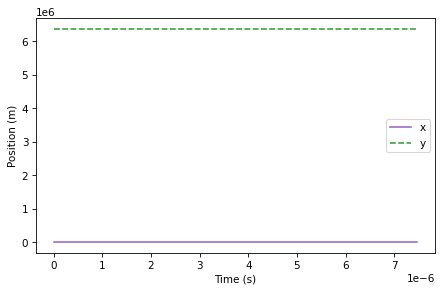

In [8]:
results.x.plot(color='C4')
results.y.plot(color='C2', style='--')

print(results.x.max())
print(results.y.max())
print(results.x.min())
print(results.y.min())

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

0.0
6378000.0
0.0
6377999.999999949


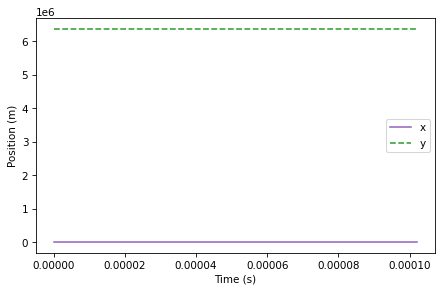

In [9]:
telemetry_df.x.plot(color='C4')
telemetry_df.y.plot(color='C2', style='--')

print(telemetry_df.x.max())
print(telemetry_df.y.max())
print(telemetry_df.x.min())
print(telemetry_df.y.min())

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

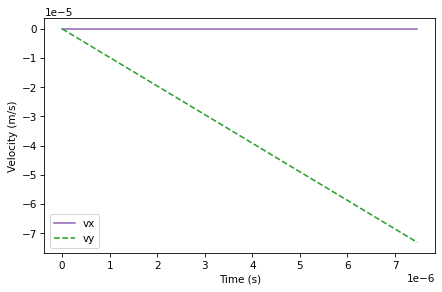

In [10]:
results.vx.plot(color='C4')
results.vy.plot(color='C2', style='--')

decorate(xlabel='Time (s)',
         ylabel='Velocity (m/s)')

NameError: name 'params' is not defined

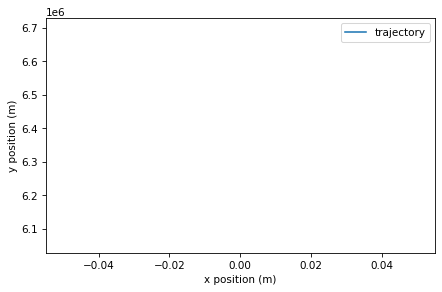

In [11]:
def plot_trajectory(results):
    x = results.x
    y = results.y
    make_series(x, y).plot(label='trajectory')

    decorate(xlabel='x position (m)',
             ylabel='y position (m)')
    
    ax = plt.gca()
    pp2 = plt.Circle((0, 0), params.earth_diameter / 2)
    pp2.set_facecolor('#37a344')
    ax.add_patch(pp2)
    
    

plot_trajectory(results)

In [ ]:
telemetry_df.trust_f.plot(label='Trust')

decorate(xlabel='Time (s)',
            ylabel='Trust (N)')

In [ ]:
telemetry_df.ax.plot(label='x')
telemetry_df.ay.plot(label='y')

decorate(xlabel='Time (s)',
            ylabel='Acceleration (m/s^2)')

In [ ]:
telemetry_df.atx.plot(label='x')
telemetry_df.aty.plot(label='y')

decorate(xlabel='Time (s)',
            ylabel='Trust (m/s^2)')

In [ ]:
telemetry_df.gx.plot(label='x')
telemetry_df.gy.plot(label='y')

decorate(xlabel='Time (s)',
            ylabel='Gravity (m/s^2)')

In [ ]:
telemetry_df.mass.plot(label='mass')

decorate(xlabel='Time (s)',
            ylabel='Mass (kg)')

In [ ]:
from matplotlib.pyplot import plot

xlim = results.x.min(), results.x.max()
ylim = results.y.min(), results.y.max()

def draw_func(t, state):
    plot(state.x, state.y, 'bo')
    decorate(xlabel='x position (m)',
             ylabel='y position (m)',
             xlim=xlim,
             ylim=ylim)

In [ ]:
animate(results, draw_func)